## Importing the neccessary libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [41]:
print(keras.__version__)

2.11.0


In [42]:
df_gt = pd.read_csv("gas_turbines.csv")
df_gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [43]:
df_gt.shape

(15039, 11)

In [44]:
df_gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [45]:
df_gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [46]:
df_gt.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

## Correlation matrix with the help of heatmap

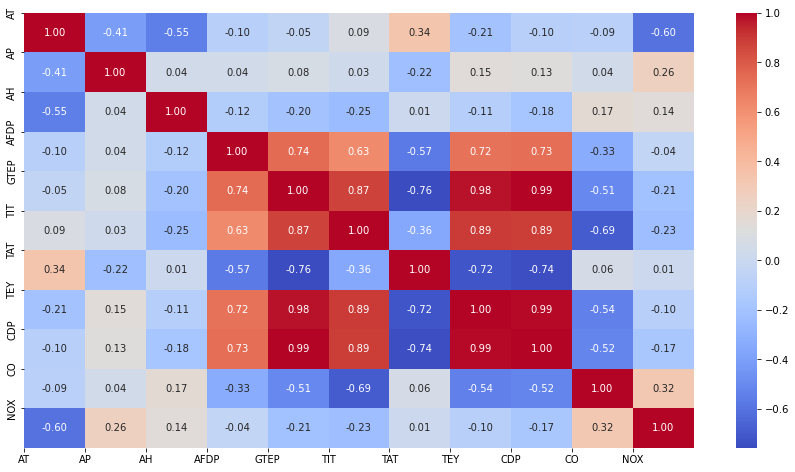

In [47]:
corr = df_gt.corr()
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [48]:
# From heatmap we can infer that NOX,CO,AH,AP,AT not shown good co-relation with TEY
# So we can drop them.

In [49]:
# Taking target feature 'TEY' at 0th index position

In [50]:
y = df_gt['TEY']
df_gt.drop(['TEY'], axis=1, inplace=True)
df_gt.insert(0, 'TEY', y)
df_gt.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [51]:
X = df_gt.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = df_gt.iloc[:, 0]

# Selecting first 600 records
X = X.iloc[0:600, :]
y = y.iloc[0:600]

### Scaling

In [52]:
scaler = StandardScaler()
scaler.fit(X)
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

### Splitting the data in train and test

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (420, 5)
Shape of x_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test:  (180,)


## Grid search hyperparameters all at once

### Importing the necessary packages

In [55]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [56]:
def create_model(learning_rate, dropout_rate, activation_function, init, neuron1, neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 5, kernel_initializer = init, activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer = init, activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = ['mse'])
    return model

### Create the model

In [57]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters

batch_size = [20, 40]
epochs = [50, 100]
learning_rate = [0.01, 0.1]
dropout_rate = [0.1, 0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4, 8]
neuron2 = [2, 4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size, epochs = epochs, learning_rate = learning_rate, dropout_rate = dropout_rate,
                   activation_function = activation_function, init = init, neuron1 = neuron1, neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 5ms/step
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.893 total time=   2.1s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-3.982 total time=   2.0s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================

3/3 [==============================] - 0s 0s/step
[CV 3/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.619 total time=   2.1s
[CV 4/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 6ms/step
[CV 4/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.955 total time=   2.1s
[CV 5/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 9ms/step
[CV 5/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.345 total time=   2.3s
[CV 1/5; 6/256] START 

3/3 [==============================] - 0s 8ms/step
[CV 5/5; 9/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.345 total time=   2.1s
[CV 1/5; 10/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 7ms/step
[CV 1/5; 10/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.893 total time=   2.1s
[CV 2/5; 10/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 2/5; 10/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-3.982 total time=   2.1s
[CV 3/5; 10/256] 

3/3 [==============================] - 0s 4ms/step
[CV 2/5; 14/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-3.982 total time=   2.1s
[CV 3/5; 14/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 3/5; 14/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.619 total time=   2.2s
[CV 4/5; 14/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 7ms/step
[CV 4/5; 14/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.955 total time=   2.2s
[CV 5/5; 14/256] STAR

3/3 [==============================] - 0s 7ms/step
[CV 4/5; 18/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.955 total time=   3.8s
[CV 5/5; 18/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 7ms/step
[CV 5/5; 18/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.345 total time=   3.4s
[CV 1/5; 19/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 1/5; 19/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.893 total time=   3.4s
[CV 2/

3/3 [==============================] - 0s 6ms/step
[CV 1/5; 23/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.893 total time=   3.5s
[CV 2/5; 23/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 5ms/step
[CV 2/5; 23/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-3.982 total time=   3.5s
[CV 3/5; 23/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 3/5; 23/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.619 total time=   3.5s
[CV 4/5; 23

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.619 total time=   3.4s
[CV 4/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 7ms/step
[CV 4/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.955 total time=   3.5s
[CV 5/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 9ms/step
[CV 5/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.345 total time=   3.5s
[CV 1/5; 28

3/3 [==============================] - 0s 8ms/step
[CV 5/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.345 total time=   3.5s
[CV 1/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 1/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.893 total time=   3.4s
[CV 2/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 7ms/step
[CV 2/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-3.982 total time=   3.4s
[CV 3/5; 32/256]

3/3 [==============================] - 0s 5ms/step
[CV 2/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-3.982 total time=   2.6s
[CV 3/5; 36/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 3/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.619 total time=   2.1s
[CV 4/5; 36/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 4/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.955 total time=   2.1s
[CV 5/5; 36

3/3 [==============================] - 0s 8ms/step
[CV 4/5; 40/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.955 total time=   2.2s
[CV 5/5; 40/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 4ms/step
[CV 5/5; 40/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.345 total time=   2.1s
[CV 1/5; 41/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 1/5; 41/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.893 total time=   2.1s
[CV 2/5; 41/256]

3/3 [==============================] - 0s 3ms/step
[CV 1/5; 45/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.893 total time=   2.2s
[CV 2/5; 45/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 2/5; 45/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-3.982 total time=   2.1s
[CV 3/5; 45/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 3/5; 45/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.619 total time=   2.1s
[CV 4/5; 45/256] STAR

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.619 total time=   3.4s
[CV 4/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 4/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.955 total time=   3.4s
[CV 5/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.345 total time=   3.4s
[CV 1/

3/3 [==============================] - 0s 8ms/step
[CV 5/5; 53/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.345 total time=   3.5s
[CV 1/5; 54/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 1/5; 54/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.893 total time=   4.2s
[CV 2/5; 54/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 2/5; 54/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-3.982 total time=   3.4s
[CV 3/5; 54

3/3 [==============================] - 0s 7ms/step
[CV 2/5; 58/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-3.982 total time=   3.5s
[CV 3/5; 58/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 3/5; 58/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.619 total time=   3.5s
[CV 4/5; 58/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 4/5; 58/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.955 total time=   3.4s
[CV 5/5; 58

3/3 [==============================] - 0s 0s/step
[CV 4/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.955 total time=   3.4s
[CV 5/5; 62/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 5/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.345 total time=   3.4s
[CV 1/5; 63/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 1/5; 63/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.893 total time=   3.4s
[CV 2/5; 63/256] ST

3/3 [==============================] - 0s 0s/step
[CV 1/5; 67/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.893 total time=   1.6s
[CV 2/5; 67/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 2/5; 67/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-3.982 total time=   1.6s
[CV 3/5; 67/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 3/5; 67/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.619 total time=   1.6s
[CV 4/5; 67/25

3/3 [==============================] - 0s 0s/step
[CV 3/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.619 total time=   1.6s
[CV 4/5; 71/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 4/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.955 total time=   1.6s
[CV 5/5; 71/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 5/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.345 total time=   2.0s
[CV 1/5; 72/256] ST

3/3 [==============================] - 0s 0s/step
[CV 5/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.345 total time=   1.6s
[CV 1/5; 76/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 1/5; 76/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.893 total time=   2.0s
[CV 2/5; 76/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 2/5; 76/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-3.982 total time=   1.6s
[CV 3/5; 76/256] ST

3/3 [==============================] - 0s 0s/step
[CV 2/5; 80/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-3.982 total time=   1.6s
[CV 3/5; 80/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 3/5; 80/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.619 total time=   1.6s
[CV 4/5; 80/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 4/5; 80/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.955 total time=   1.6s
[CV 5/5; 80/256] START a

3/3 [==============================] - 0s 8ms/step
[CV 4/5; 84/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.955 total time=   2.3s
[CV 5/5; 84/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 5/5; 84/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.345 total time=   2.3s
[CV 1/5; 85/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 1/5; 85/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.893 total time=   2.3s
[CV 2/5; 8

3/3 [==============================] - 0s 8ms/step
[CV 1/5; 89/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.893 total time=   2.4s
[CV 2/5; 89/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 2/5; 89/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-3.982 total time=   2.3s
[CV 3/5; 89/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 3/5; 89/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.619 total time=   2.3s
[CV 4/5; 89/2

3/3 [==============================] - 0s 0s/step
[CV 3/5; 93/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.619 total time=   2.3s
[CV 4/5; 93/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 4/5; 93/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.955 total time=   2.2s
[CV 5/5; 93/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 5/5; 93/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.345 total time=   2.3s
[CV 1/5; 94/256] 

3/3 [==============================] - 0s 8ms/step
[CV 5/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.345 total time=   1.5s
[CV 1/5; 98/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 1/5; 98/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.893 total time=   2.0s
[CV 2/5; 98/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 2/5; 98/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-3.982 total time=   1.5s
[CV 3/5; 98/

3/3 [==============================] - 0s 8ms/step
[CV 2/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-3.982 total time=   2.0s
[CV 3/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 3/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.619 total time=   1.5s
[CV 4/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 4/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.955 total time=   1.5s
[CV 5/5; 102

3/3 [==============================] - 0s 0s/step
[CV 4/5; 106/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.955 total time=   1.5s
[CV 5/5; 106/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 5/5; 106/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.345 total time=   1.6s
[CV 1/5; 107/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 1/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.893 total time=   1.6s
[CV 2/5; 107/2

3/3 [==============================] - 0s 0s/step
[CV 1/5; 111/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.893 total time=   1.6s
[CV 2/5; 111/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 2/5; 111/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-3.982 total time=   1.6s
[CV 3/5; 111/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 3/5; 111/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.619 total time=   1.6s
[CV 4/5; 111/256] S

3/3 [==============================] - 0s 0s/step
[CV 3/5; 115/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.619 total time=   2.3s
[CV 4/5; 115/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 4/5; 115/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.955 total time=   2.3s
[CV 5/5; 115/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 5/5; 115/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.345 total time=   2.3s
[CV

3/3 [==============================] - 0s 0s/step
[CV 5/5; 119/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.345 total time=   2.3s
[CV 1/5; 120/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 1/5; 120/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.893 total time=   2.3s
[CV 2/5; 120/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 2/5; 120/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-3.982 total time=   2.7s
[CV 3/5; 

3/3 [==============================] - 0s 0s/step
[CV 2/5; 124/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-3.982 total time=   2.7s
[CV 3/5; 124/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 3/5; 124/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.619 total time=   2.3s
[CV 4/5; 124/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 4/5; 124/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.955 total time=   2.3s
[CV 5/5; 

3/3 [==============================] - 0s 8ms/step
[CV 4/5; 128/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.955 total time=   2.3s
[CV 5/5; 128/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 5/5; 128/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.345 total time=   2.3s
[CV 1/5; 129/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 1/5; 129/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.893 total time=   2.1s
[CV 2/5

3/3 [==============================] - 0s 0s/step
[CV 1/5; 133/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.893 total time=   2.1s
[CV 2/5; 133/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 2/5; 133/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-3.982 total time=   2.0s
[CV 3/5; 133/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 3/5; 133/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.619 total time=   2.1s
[CV 

3/3 [==============================] - 0s 8ms/step
[CV 3/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.619 total time=   2.1s
[CV 4/5; 137/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 4/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.955 total time=   2.1s
[CV 5/5; 137/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 5/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.345 total time=   2.1s
[CV

3/3 [==============================] - 0s 8ms/step
[CV 5/5; 141/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.345 total time=   2.1s
[CV 1/5; 142/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 1/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.893 total time=   2.0s
[CV 2/5; 142/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 2/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-3.982 total time=   2.1s
[CV 3/5

3/3 [==============================] - 0s 8ms/step
[CV 2/5; 146/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-3.982 total time=180.1min
[CV 3/5; 146/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 3/5; 146/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.619 total time=   3.7s
[CV 4/5; 146/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 1s 0s/step
[CV 4/5; 146/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.955 total time=

3/3 [==============================] - 0s 5ms/step
[CV 4/5; 150/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.955 total time=   3.2s
[CV 5/5; 150/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 5ms/step
[CV 5/5; 150/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.345 total time=   3.2s
[CV 1/5; 151/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 151/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.893 total time=   3

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 155/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.893 total time=   3.2s
[CV 2/5; 155/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 155/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-3.982 total time=   3.6s
[CV 3/5; 155/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 155/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.619 total time=   3

3/3 [==============================] - 0s 5ms/step
[CV 3/5; 159/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.619 total time=   3.6s
[CV 4/5; 159/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 4/5; 159/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.955 total time=   3.2s
[CV 5/5; 159/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 5/5; 159/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.345 total time=   3.2s
[

3/3 [==============================] - 0s 4ms/step
[CV 5/5; 163/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.345 total time=   2.0s
[CV 1/5; 164/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 6ms/step
[CV 1/5; 164/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.893 total time=   2.0s
[CV 2/5; 164/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 4ms/step
[CV 2/5; 164/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-3.982 total time=   2

3/3 [==============================] - 0s 10ms/step
[CV 2/5; 168/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-3.982 total time=   2.0s
[CV 3/5; 168/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 5ms/step
[CV 3/5; 168/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.619 total time=   2.0s
[CV 4/5; 168/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 4/5; 168/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.955 total time=   2.0s


3/3 [==============================] - 0s 6ms/step
[CV 4/5; 172/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.955 total time=   2.0s
[CV 5/5; 172/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 4ms/step
[CV 5/5; 172/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.345 total time=   2.0s
[CV 1/5; 173/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 5ms/step
[CV 1/5; 173/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.893 total time=   2.0s
[CV

3/3 [==============================] - 0s 4ms/step
[CV 1/5; 177/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.893 total time=   3.2s
[CV 2/5; 177/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 5ms/step
[CV 2/5; 177/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-3.982 total time=   3.2s
[CV 3/5; 177/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 9ms/step
[CV 3/5; 177/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.619 total time

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 181/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.619 total time=   3.2s
[CV 4/5; 181/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 4ms/step
[CV 4/5; 181/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.955 total time=   3.2s
[CV 5/5; 181/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 5/5; 181/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.345 total time=   3

3/3 [==============================] - 0s 5ms/step
[CV 5/5; 185/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.345 total time=   3.2s
[CV 1/5; 186/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 6ms/step
[CV 1/5; 186/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.893 total time=   3.2s
[CV 2/5; 186/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 2/5; 186/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-3.982 total time=   3

3/3 [==============================] - 0s 8ms/step
[CV 2/5; 190/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-3.982 total time=   3.2s
[CV 3/5; 190/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 7ms/step
[CV 3/5; 190/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.619 total time=   3.2s
[CV 4/5; 190/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 4/5; 190/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.955 total time=   3.1s
[

3/3 [==============================] - 0s 3ms/step
[CV 4/5; 194/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.955 total time=   1.5s
[CV 5/5; 194/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 5/5; 194/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.345 total time=   1.5s
[CV 1/5; 195/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 1/5; 195/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.893 total time=   1

3/3 [==============================] - 0s 4ms/step
[CV 1/5; 199/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.893 total time=   1.5s
[CV 2/5; 199/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 9ms/step
[CV 2/5; 199/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-3.982 total time=   1.5s
[CV 3/5; 199/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 6ms/step
[CV 3/5; 199/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.619 total time=   1.5s
[

3/3 [==============================] - 0s 5ms/step
[CV 3/5; 203/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.619 total time=   1.6s
[CV 4/5; 203/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 4/5; 203/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.955 total time=   1.6s
[CV 5/5; 203/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 9ms/step
[CV 5/5; 203/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.345 total time=   1.5s
[C

3/3 [==============================] - 0s 0s/step
[CV 5/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.345 total time=   1.5s
[CV 1/5; 208/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 1/5; 208/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.893 total time=   1.5s
[CV 2/5; 208/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 2/5; 208/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-3.982 total time=   1.5s
[CV 3/5; 

3/3 [==============================] - 0s 0s/step
[CV 2/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-3.982 total time=   2.3s
[CV 3/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 3/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.619 total time=   2.2s
[CV 4/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 4/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.955 total time=

3/3 [==============================] - 0s 0s/step
[CV 4/5; 216/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.955 total time=   2.2s
[CV 5/5; 216/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 5/5; 216/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.345 total time=   2.3s
[CV 1/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 1/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.893 total time=   2.7s

3/3 [==============================] - 0s 8ms/step
[CV 1/5; 221/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.893 total time=   2.3s
[CV 2/5; 221/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 2/5; 221/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-3.982 total time=   2.7s
[CV 3/5; 221/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 3/5; 221/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.619 total time=   2.3s
[C

3/3 [==============================] - 0s 0s/step
[CV 3/5; 225/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.619 total time=   1.5s
[CV 4/5; 225/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 4/5; 225/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.955 total time=   2.0s
[CV 5/5; 225/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 5/5; 225/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.345 total time=   1.5s

3/3 [==============================] - 0s 0s/step
[CV 5/5; 229/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.345 total time=   2.0s
[CV 1/5; 230/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 1/5; 230/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.893 total time=   1.5s
[CV 2/5; 230/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 2/5; 230/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-3.982 total time=   1.5s
[CV

3/3 [==============================] - 0s 0s/step
[CV 2/5; 234/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-3.982 total time=   2.0s
[CV 3/5; 234/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 8ms/step
[CV 3/5; 234/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.619 total time=   1.5s
[CV 4/5; 234/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 4/5; 234/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.955 total time=   1.5s
[CV

3/3 [==============================] - 0s 8ms/step
[CV 4/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.955 total time=   2.0s
[CV 5/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 5/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.345 total time=   1.5s
[CV 1/5; 239/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 1/5; 239/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.893 total time=   1.5s
[CV 2/5

3/3 [==============================] - 0s 0s/step
[CV 1/5; 243/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.893 total time=   2.8s
[CV 2/5; 243/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 2/5; 243/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-3.982 total time=   2.3s
[CV 3/5; 243/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 3/5; 243/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.619 total time= 

3/3 [==============================] - 0s 8ms/step
[CV 3/5; 247/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.619 total time=   2.8s
[CV 4/5; 247/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 0s/step
[CV 4/5; 247/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.955 total time=   2.3s
[CV 5/5; 247/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 8ms/step
[CV 5/5; 247/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.345 total time=   2.

3/3 [==============================] - 0s 0s/step
[CV 5/5; 251/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.345 total time=   2.3s
[CV 1/5; 252/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 1/5; 252/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.893 total time=   2.8s
[CV 2/5; 252/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 2/5; 252/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-3.982 total time=   2.3s

3/3 [==============================] - 0s 0s/step
[CV 2/5; 256/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-3.982 total time=   2.8s
[CV 3/5; 256/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 3/5; 256/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.619 total time=   2.3s
[CV 4/5; 256/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 0s/step
[CV 4/5; 256/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.955 total time=   2.3s
[CV 

### Summarize the results

In [58]:
print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best : -4.758532348031901, using {'activation_function': 'relu', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 2}


## Training model with optimum values of Hyperparameters

In [59]:
final_model = Sequential()
final_model.add(Dense(4, input_dim = 5, kernel_initializer = 'uniform', activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2, input_dim = 4, kernel_initializer = 'uniform', activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1, activation = 'linear'))
    
adam = adam_v2.Adam(learning_rate = 0.01)

In [60]:
# Compile the Model

final_model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = ['mse'])

In [61]:
# Fit the model

final_model.fit(x_train, y_train, epochs=50, batch_size=20)

Epoch 1/50
21/21 [==============================] - 1s 2ms/step - loss: 0.9921 - mse: 0.9921
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9808 - mse: 0.9808
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9803 - mse: 0.9803
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9808 - mse: 0.9808
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9812 - mse: 0.9812
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9800 - mse: 0.9800
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9818 - mse: 0.9818
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9806 - mse: 0.9806
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9798 - mse: 0.9798
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9799 - mse: 0.9799
Epoch 11/50
21/21 [==============================] - 0s 2ms/step - lo

In [62]:
scores = final_model.evaluate(x_test, y_test)
print((final_model.metrics_names[1]))

6/6 [==============================] - 0s 3ms/step - loss: 1.0482 - mse: 1.0482
mse
